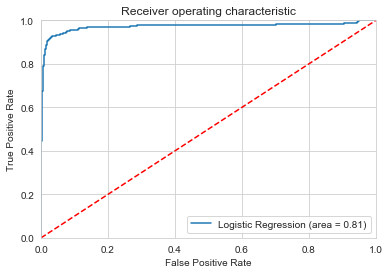

In [126]:
logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [128]:
import sklearn.metrics as m

In [129]:
y_test.size

16000

In [130]:
prediction.size

16000

In [136]:
m.r2_score(y_test,prediction)

0.4647893333333334

In [137]:
from sklearn.model_selection import cross_validate

In [138]:
cross_validate(LogisticRegression(),X_train,y_train,cv=5)

{'fit_time': array([7.86593437, 8.92214656, 7.53984237, 8.89322329, 7.23665309]),
 'score_time': array([0.01495886, 0.01897979, 0.01695395, 0.01595664, 0.01994705]),
 'test_score': array([0.98283333, 0.98566667, 0.984     , 0.98558333, 0.98325   ]),
 'train_score': array([0.98302083, 0.98502083, 0.98322917, 0.98545833, 0.98335417])}

In [139]:
cross_val_score(LogisticRegression(),X_train,y_train,cv=5)

array([0.98283333, 0.98566667, 0.984     , 0.98558333, 0.98325   ])

In [140]:
cross_val_predict(LogisticRegression(),X_train,y_train,cv=5)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

import sklearn.metrics as m

y_test.size

prediction.size

m.r2_score(y_test,prediction)

from sklearn.model_selection import cross_validate

cross_validate(LogisticRegression(),X_train,y_train,cv=5)

cross_val_score(LogisticRegression(),X_train,y_train,cv=5)

cross_val_predict(LogisticRegression(),X_train,y_train,cv=5)

# With test data 

In [15]:
#here the predictors (X) and responce (y) is separated from the sample_data for this model

X_train = sample_training_data_FA.drop('class',axis=1)
y_train = sample_training_data_FA['class']
X_test = sample_testing_data_FA.drop('class',axis=1)
y_test = sample_testing_data_FA['class']

In [16]:
logmodel = LogisticRegression()

#fitting the data
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
prediction = logmodel.predict(X_test)

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.81      0.62      0.70       375

   micro avg       0.99      0.99      0.99     16000
   macro avg       0.90      0.81      0.85     16000
weighted avg       0.99      0.99      0.99     16000



<b>Here we can see, Negative class prediction is about 99% correct , where Positive class prediction guarantees upto 81%</b><br>
Now, for the cost

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test,prediction).ravel()

cost = 10*fp+500*fn

values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,71540,54,142


# Now with CV folds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

In [3]:
training_data = pd.read_csv("../Data/aps_failure_training_set.csv",na_values="na")
training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Preprocessing

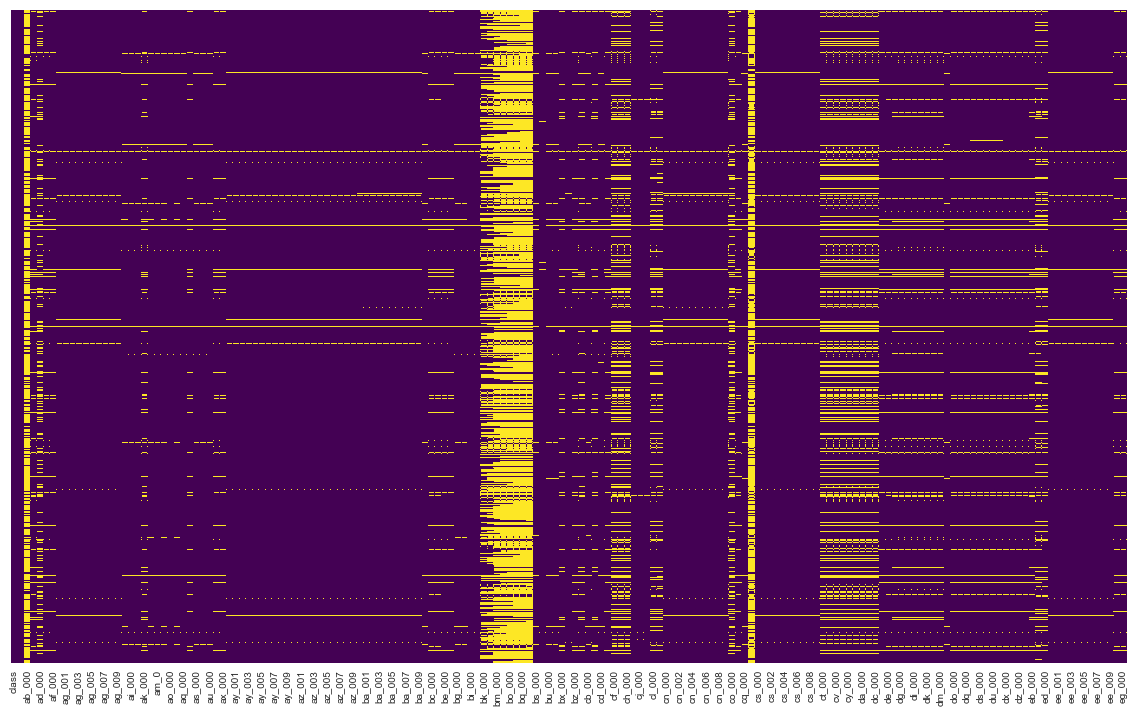

In [4]:
plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

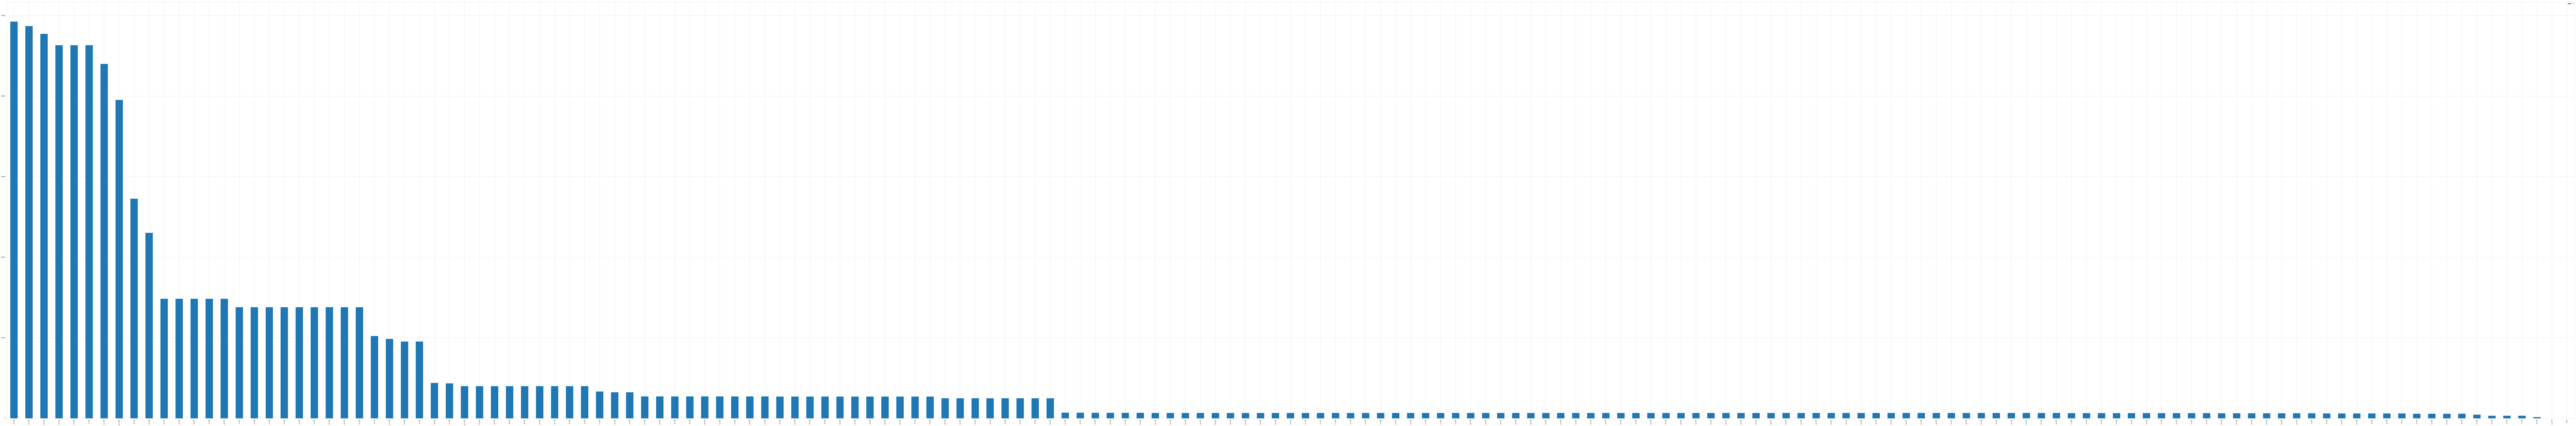

In [15]:
missing = training_data.isna().sum().to_frame().sort_values(by=0, ascending = False)
missing.plot.bar(figsize=(300,50))

In [16]:
missing[missing[0]>80]

,0
br_000,49264
bq_000,48722
bp_000,47740
bo_000,46333
ab_000,46329
cr_000,46329
bn_000,44009
bm_000,39549
bl_000,27277
bk_000,23034


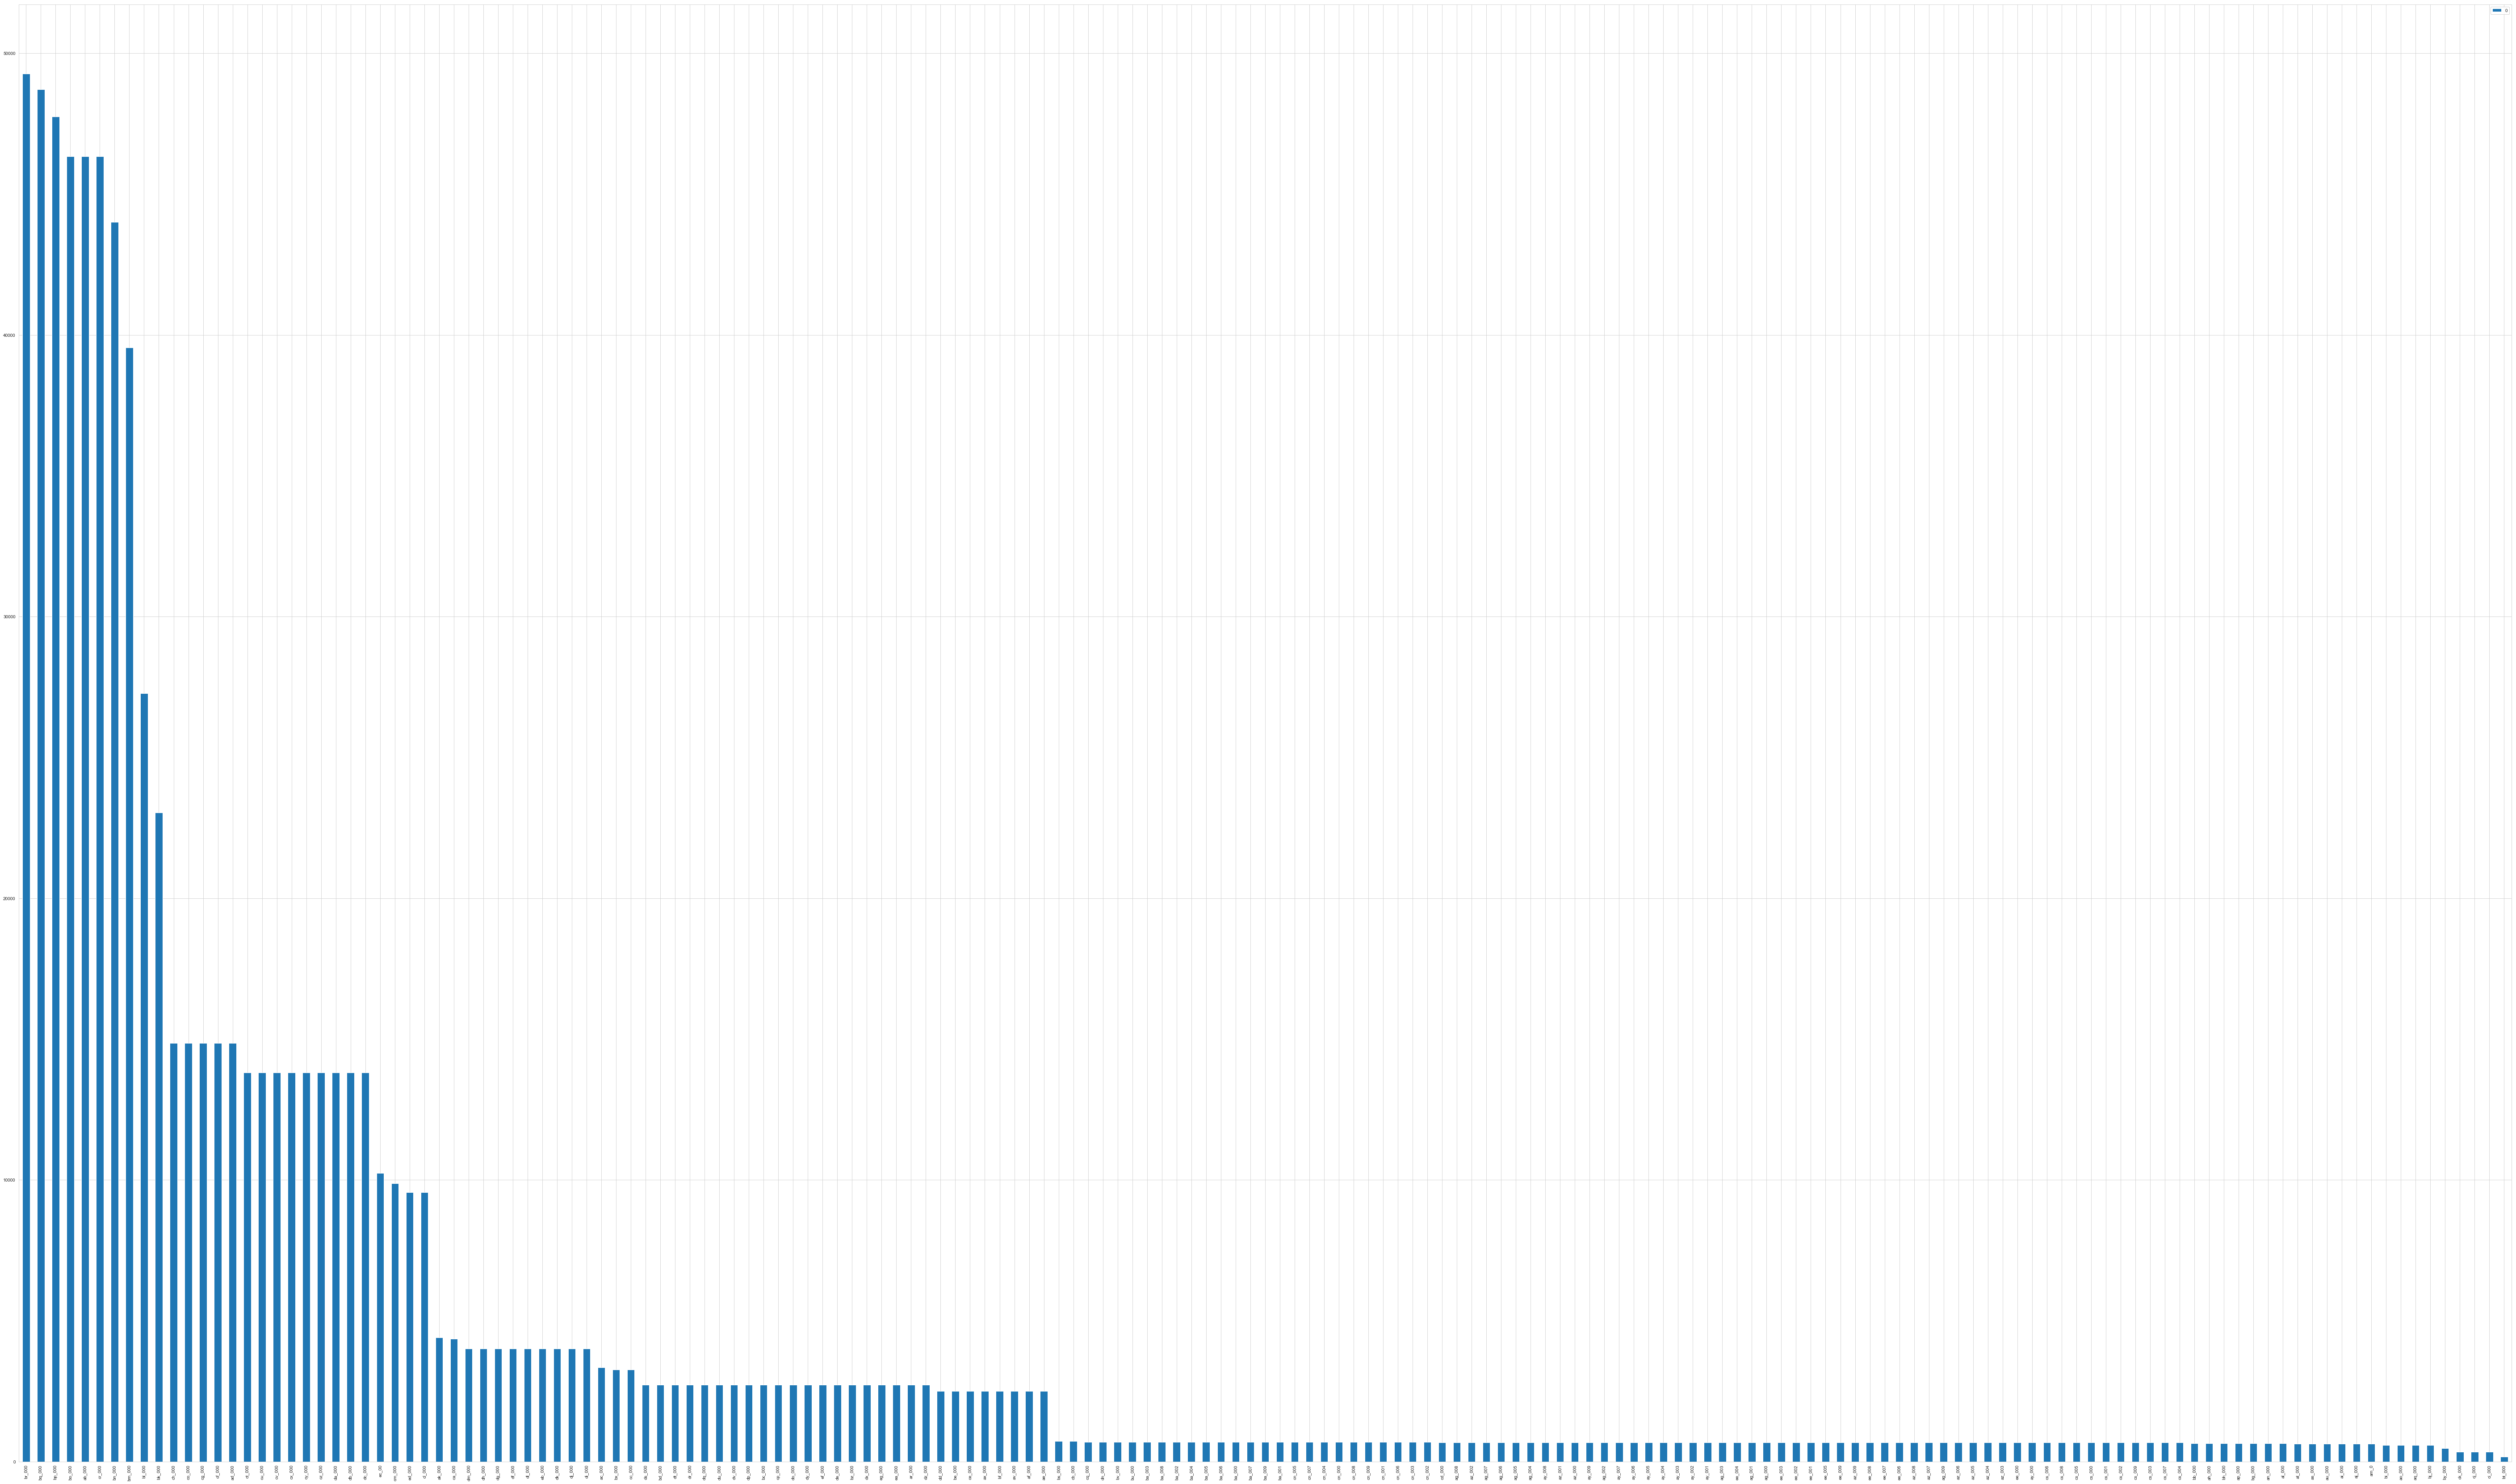

In [12]:
temp = missing[missing[0]>90]
temp.plot.bar(figsize=(100,60))